<a href="https://colab.research.google.com/github/mong-head/machine_learning/blob/master/midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

**Load TADPOLE* dataset (csv file) from Google Drive**
-------------------------------------------------------
*The Alzheimer's Disease Prediction Of Longitudinal Evolution
(https://tadpole.grand-challenge.org/)

### -Subjects: 1707 (1363 Train (80%) + 344 Test (20%))


### -Features: 72
*   2 demographic feature: MMSE, ADAS13
*   70 mean values of cortical thickness

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

csv_file_train = '/content/gdrive/My Drive/BNCS401_Midterm_Project/Train_data_reupdated.csv'  # Set your path
train_data = pd.read_csv(csv_file_train)
train_data

# DXCHANGE: clinical label (1-CN, 2-MCI, 3-AD)

Mounted at /content/gdrive


,RID,DXCHANGE,AGE,MMSE,ADAS13,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,4084,1,68.4,30,10.00,2.700,2.635,2.613,2.904,2.311,1.647,2.139,2.652,2.604,2.480,3.095,2.144,2.792,2.207,2.903,2.617,4.117,2.701,,3.127,3.051,2.305,2.872,2.732,2.026,3.756,2.813,2.762,2.556,2.916,2.695,2.259,2.690,2.017,2.421,2.949,2.570,2.370,2.674,3.004,2.369,1.599,2.208,2.650,2.739,2.544,3.018,2.377,2.880,2.322,2.657,2.489,3.620,2.711,,2.593,2.792,2.660,1.993,3.734,2.390,2.817,2.471,2.990,2.667,2.490,2.523,2.254,2.171,2.862
1,2196,2,68.2,30,13.00,2.453,2.992,2.470,2.965,2.438,1.584,1.910,2.900,2.451,2.335,2.771,2.354,2.712,2.001,2.729,2.363,3.613,2.475,,3.196,3.334,2.343,2.729,2.627,1.742,3.383,2.647,2.758,2.394,2.634,2.334,2.241,2.824,1.865,2.383,2.866,2.334,2.793,2.413,2.874,2.316,1.478,1.909,2.780,2.589,2.133,3.036,2.329,2.687,2.070,2.783,2.594,3.405,2.367,,2.582,2.977,2.489,1.868,3.220,2.683,2.569,2.372,2.854,2.867,2.233,2.793,1.987,2.428,2.943
2,657,1,77.7,29,15.33,2.249,2.296,2.315,2.681,2.420,1.386,1.830,2.466,2.3

# **1. data 처리**

In [0]:
# 일단 RID값은 별로 필요없을 거 같다. drop시킬 것임 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 75 columns):
RID                                            1363 non-null int64
DXCHANGE                                       1363 non-null int64
AGE                                            1363 non-null float64
MMSE                                           1363 non-null int64
ADAS13                                         1353 non-null float64
ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST

In [0]:
train_data['ADAS13'].describe()

count    1353.000000
mean       16.767191
std         9.470979
min         0.000000
25%         9.330000
50%        15.000000
75%        22.670000
max        51.000000
Name: ADAS13, dtype: float64

필요없는 데이터 버리기 : RID
---

In [0]:
train_data = train_data.drop("RID",axis=1)

object 처리 : space to NaN
---


엄청 비어져보이는 2개의 데이터가 둘다 object였다.

근데 실제로는 float값인 것 같아 ' '인 부분들을 모두nan으로 바꾼다.
안그러면 imputer로 연산이 안되는 듯

실제 비어진 데이터로는 cortical값중에 1개가 1개가 비어져있다. 이 값을 median으로 채우면 될 거 같고, 

예측 값중에 하나인 ADAS13도 10개가 비어져있다. 이것도 채우면 될듯 imputer사용해서


In [0]:
train_data["ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16"].value_counts()

         724
1.17       6
1.005      5
1.086      5
1.172      5
        ... 
1.022      1
0.889      1
0.954      1
1          1
1.218      1
Name: ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16, Length: 379, dtype: int64

In [0]:
train_data["ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16"][0] #그냥 space로 뜬다.

' '

In [0]:
def object_to_float(o): #o = train_data["~~"] 형태
  for i in range(1363):
    if o[i] == ' ':
      o[i] = np.nan #nan으로 채움

In [0]:
object_to_float(train_data["ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
object_to_float(train_data["ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 74 columns):
DXCHANGE                                       1363 non-null int64
AGE                                            1363 non-null float64
MMSE                                           1363 non-null int64
ADAS13                                         1353 non-null float64
ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64


In [0]:
#빈 데이터 보기
incomplete_rows = train_data[train_data.isnull().any(axis=1)]#.head()
incomplete_rows

,DXCHANGE,AGE,MMSE,ADAS13,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,1,68.4,30,10.0,2.700,2.635,2.613,2.904,2.311,1.647,2.139,2.652,2.604,2.480,3.095,2.144,2.792,2.207,2.903,2.617,4.117,2.701,NaN,3.127,3.051,2.305,2.872,2.732,2.026,3.756,2.813,2.762,2.556,2.916,2.695,2.259,2.690,2.017,2.421,2.949,2.570,2.370,2.674,3.004,2.369,1.599,2.208,2.650,2.739,2.544,3.018,2.377,2.880,2.322,2.657,2.489,3.620,2.711,NaN,2.593,2.792,2.660,1.993,3.734,2.390,2.817,2.471,2.990,2.667,2.490,2.523,2.254,2.171,2.862
1,2,68.2,30,13.0,2.453,2.992,2.470,2.965,2.438,1.584,1.910,2.900,2.451,2.335,2.771,2.354,2.712,2.001,2.729,2.363,3.613,2.475,NaN,3.196,3.334,2.343,2.729,2.627,1.742,3.383,2.647,2.758,2.394,2.634,2.334,2.241,2.824,1.865,2.383,2.866,2.334,2.793,2.413,2.874,2.316,1.478,1.909,2.780,2.589,2.133,3.036,2.329,2.687,2.070,2.783,2.594,3.405,2.367,NaN,2.582,2.977,2.489,1.868,3.220,2.683,2.569,2.372,2.854,2.867,2.233,2.793,1.987,2.428,2.943
3,3,79.4,22,24.0,2.197,2.289,2.258,2.413,2.124,1.473,1.729,2.680,2.184,2.144,

train -> training set(AD_tr)과 label(AD_label_reg, AD_label_class)로 나눔
---

In [0]:
from pandas import Series, DataFrame

AD_tr = train_data.drop("MMSE",axis = 1)
AD_tr = AD_tr.drop("ADAS13",axis = 1)
AD_tr = AD_tr.drop("DXCHANGE",axis = 1)

y = AD_label_reg = DataFrame({"MMSE":train_data["MMSE"].copy(),
                         "ADAS13":train_data["ADAS13"].copy()})

y_mmse = AD_mmse = DataFrame({"MMSE":train_data["MMSE"].copy()})
y_ada = AD_ada = DataFrame({"ADAS13":train_data["ADAS13"].copy()})

y_cls = AD_label_class = DataFrame({"DXCHANGE":train_data["DXCHANGE"]})

imputer
---

빈 데이터 median으로 채워넣기

AD_tr : 채워넣은 데이터 이름

In [0]:
#빈 데이터 median으로 채워넣음
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [0]:
imputer.fit(AD_tr)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
X = imputer.transform(AD_tr)

In [0]:
AD_tr = pd.DataFrame(X, columns=AD_tr.columns,
                             index=AD_tr.index)

In [0]:
AD_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 71 columns):
AGE                                            1363 non-null float64
ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null float64
ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    1363 non-null floa

In [0]:
incomplete_rows = AD_tr[AD_tr.isnull().any(axis=1)]#.head()
incomplete_rows
#빈데이터 없는거 볼 수 있음

,AGE,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16


AD_label_reg에도 NaN값있음 - ASAD13

In [0]:
imputer.fit(AD_label_reg)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
X = imputer.transform(AD_label_reg)

In [0]:
y = AD_label_reg = pd.DataFrame(X, columns=AD_label_reg.columns,
                             index=AD_label_reg.index)

In [0]:
AD_label_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 2 columns):
MMSE      1363 non-null float64
ADAS13    1363 non-null float64
dtypes: float64(2)
memory usage: 21.4 KB


In [0]:
AD_tr.describe()

,AGE,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
count,1363.000000,1363.000000,1363.00000,1363.000000,1363.00000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,73.829934,2.159362,2.52010,2.377216,2.52305,2.244894,1.454748,1.817326,2.394646,2.226582,2.141666,2.805

In [0]:
AD_label_reg.describe()

,MMSE,ADAS13
count,1363.000000,1363.000000
mean,27.215701,16.754226
std,2.663533,9.437353
min,18.000000,0.000000
25%,26.000000,9.330000
50%,28.000000,15.000000
75%,29.000000,22.330000
max,30.000000,51.000000


asd
---

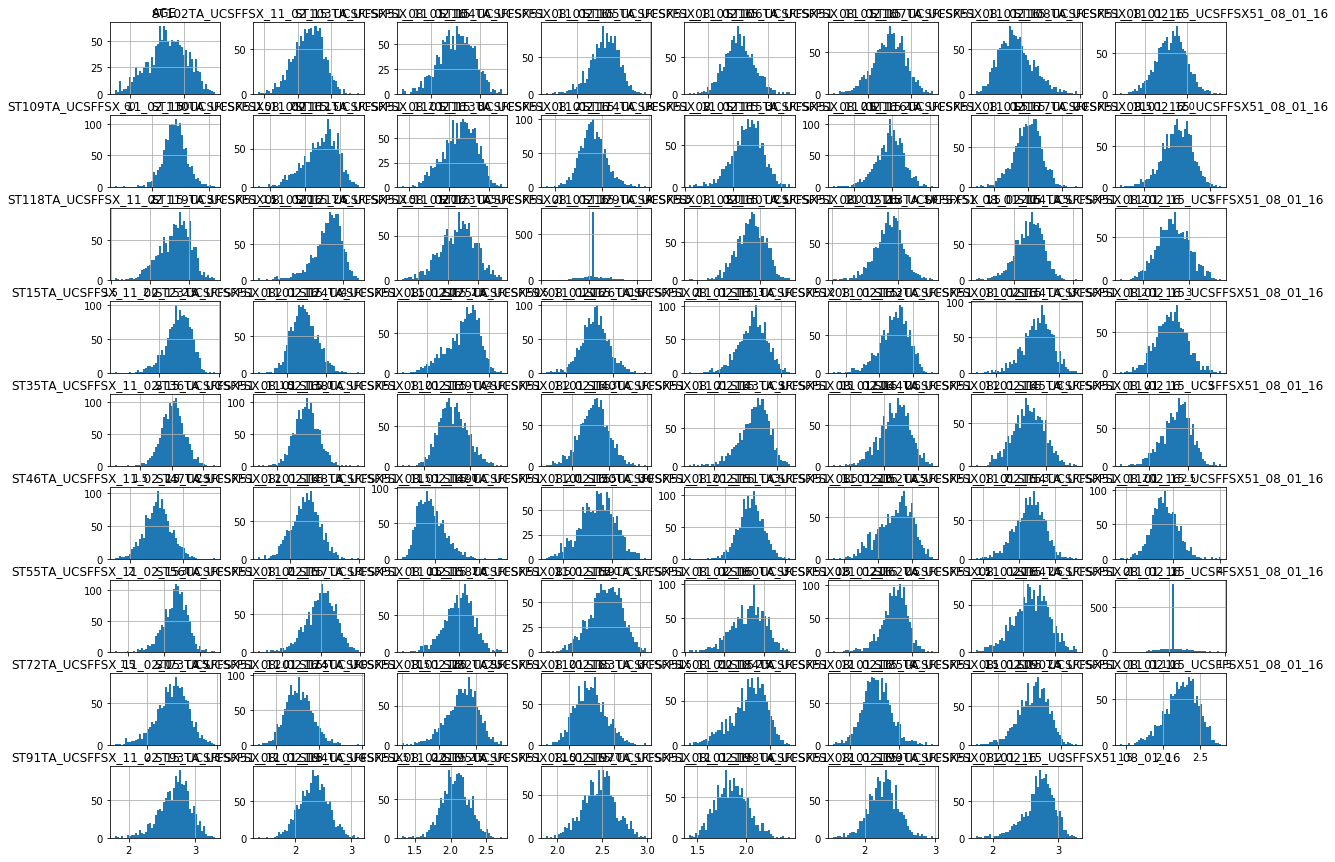

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
AD_tr.hist(bins=50,figsize=(20,15))
plt.show()

찾아야할 ADAS13빼고는 거의 normal분포 보임

feature scaling : standardazation - standardscaler
---
값 범위 같게


In [0]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(AD_tr)
#AD_tr = scaler.transform(AD_tr)
#AD_tr.shape

pipeline
---



*   .fit(training data) : training data의 분포 추정 - pre-processing on data없이 model train
*   .transform(traning data) : training data 변환 - pre-processing on the data하길 원할때
*   .fit_transform(") : 위 두 과정 합침



In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
                     ('imputer',SimpleImputer(strategy="median")),
                     ('std_scaler',StandardScaler()),
])
X = AD_tr_prepared = pipeline.fit_transform(AD_tr)
X

array([[-0.74878016,  2.49868136,  0.32355374, ...,  2.4868979 ,
        -0.4451168 ,  0.69648281],
       [-0.77635987,  1.35711537,  1.32884932, ...,  0.83216551,
         0.79019967,  1.04886394],
       [ 0.53367659,  0.41428353, -0.63105467, ..., -0.01689194,
         1.0786004 ,  0.54856974],
       ...,
       [-0.00412785, -0.75501281,  0.07011787, ..., -0.94031938,
         2.33314359,  0.32670014],
       [ 1.26453904, -1.5591929 , -0.03407242, ..., -0.28958192,
        -0.92578469, -1.97465317],
       [ 1.36106804,  0.39579663, -0.4761772 , ..., -0.22140942,
        -0.68545075, -0.50422327]])

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(X,test_size=0.2,random_state= 42)
y_cls_train,y_cls_test = train_test_split(y_cls,test_size=0.2,random_state= 42)

# 2. select and train a model

train err
---

1) linear regression
---
이건 아닌거같음 다시 생각해보기
이건 절대 아님 그냥 연습한다는 생각으로 함

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(AD_tr_prepared,AD_label_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
some_data = AD_tr.iloc[:5]
some_labels = AD_label_reg.iloc[:5]
some_data_prepared = pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [[29.57761639  9.38577703]
 [28.17061892 13.78304575]
 [26.76288536 16.10939961]
 [25.8441321  23.06404209]
 [25.23555574 22.21371756]]


실제 데이터와 비교

In [0]:
print("actual labels:")
some_labels

actual labels:


,MMSE,ADAS13
0,30.0,10.00
1,30.0,13.00
2,29.0,15.33
3,22.0,24.00
4,24.0,20.33


In [0]:
#RMSE사용해서 전체 error?알아봄
from sklearn.metrics import mean_squared_error

AD_predictions = lin_reg.predict(AD_tr_prepared)
lin_mse = mean_squared_error(AD_label_reg.values, AD_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.000108367545699

In [0]:
from sklearn.multioutput import MultiOutputRegressor

multilin_reg = MultiOutputRegressor(lin_reg)
multilin_reg.fit(X,y)
multi_lin_prediction = multilin_reg.predict(X)

multi_lin_mse = mean_squared_error(y, multi_lin_prediction)
multi_lin_rmse = np.sqrt(multi_lin_mse)
multi_lin_rmse

5.000108367545697

use batch GD
------

In [0]:
X = pipeline.fit_transform(AD_tr)
y = AD_label_reg.values

In [0]:
X_b = np.c_[np.ones((1363,1)),X]
X_b

array([[ 1.        , -0.74878016,  2.49868136, ...,  2.4868979 ,
        -0.4451168 ,  0.69648281],
       [ 1.        , -0.77635987,  1.35711537, ...,  0.83216551,
         0.79019967,  1.04886394],
       [ 1.        ,  0.53367659,  0.41428353, ..., -0.01689194,
         1.0786004 ,  0.54856974],
       ...,
       [ 1.        , -0.00412785, -0.75501281, ..., -0.94031938,
         2.33314359,  0.32670014],
       [ 1.        ,  1.26453904, -1.5591929 , ..., -0.28958192,
        -0.92578469, -1.97465317],
       [ 1.        ,  1.36106804,  0.39579663, ..., -0.22140942,
        -0.68545075, -0.50422327]])

In [0]:
eta = 0.02  # learning rate
n_iterations = 10000
m = 1363

theta = np.random.randn(72,2)  # random normal initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [0]:
theta

array([[ 2.72157007e+01,  1.67542260e+01],
       [ 3.30660793e-02, -3.51675628e-01],
       [-6.32638849e-02,  4.14125814e-01],
       [-1.05677769e-01, -3.63723256e-02],
       [-3.77916089e-02,  9.15561288e-03],
       [ 1.33294313e-01, -6.66321907e-01],
       [-1.04921375e-01,  6.31943167e-01],
       [ 1.27360806e-01, -3.84625492e-01],
       [ 2.18114309e-02, -3.65360905e-01],
       [ 6.67050086e-02, -2.91786073e-01],
       [-4.71084102e-01,  1.24735116e+00],
       [ 5.47479538e-01, -5.77758058e-01],
       [ 7.54788954e-02,  8.98269347e-02],
       [-4.93956881e-02,  2.35220661e-01],
       [-1.86060821e-01,  2.31064071e-02],
       [-1.67428848e-01,  2.39738629e-01],
       [ 1.45829363e-01,  1.59939712e-02],
       [-1.04529562e-01,  3.23454314e-01],
       [ 5.35923307e-02, -1.77460399e-01],
       [-2.03281224e-01,  6.80135005e-01],
       [ 7.88232880e-02, -2.48172502e-01],
       [ 7.20834509e-05,  1.99872452e-01],
       [-1.06818858e-01,  9.74553306e-02],
       [-2.

In [0]:
prediction_lin_batch = X_b.dot(theta) #예측값 - linear
prediction_lin_batch

array([[29.57761639,  9.38577703],
       [28.17061892, 13.78304575],
       [26.76288536, 16.10939961],
       ...,
       [25.74001209, 21.01194621],
       [26.80561198, 16.72758521],
       [28.39466274, 13.6270023 ]])

In [0]:
y #실제 값

array([[30.  , 10.  ],
       [30.  , 13.  ],
       [29.  , 15.33],
       ...,
       [26.  , 27.  ],
       [23.  , 29.33],
       [30.  , 12.  ]])

In [0]:
lin_batch_mse = mean_squared_error(y, prediction_lin_batch)
lin_batch_rmse = np.sqrt(lin_batch_mse)
lin_batch_rmse

5.000108367545698

batch 써도 rmse 똑같음

polynomial
---

In [0]:
from sklearn.preprocessing import PolynomialFeatures

X = pipeline.fit_transform(AD_tr)
y = AD_label_reg.values
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape  #X.shape = (1363,71)

(1363, 2627)

In [0]:
lin_reg = LinearRegression() #linear regression함
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([28.14978376, 13.99877258]),
 array([[-0.01985732, -0.00050987, -0.152108  , ..., -0.04223607,
         -0.14905269, -0.01042122],
        [-0.06771031,  0.1348252 , -0.04605319, ..., -0.01511187,
         -0.18083864,  0.20477009]]))

In [0]:
poly_lin_predictions = lin_reg.predict(X_poly)
poly_lin_mse = mean_squared_error(y, poly_lin_predictions)
poly_lin_rmse = np.sqrt(poly_lin_mse)
poly_lin_rmse

6.009735438178506e-14

polynomial training loss 는 거의 0에 가까움

validation err - linear, poly (using cross validation, learning curve)
---

1. cross validation

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

degree = 1

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg,X,y,
                         scoring="neg_mean_squared_error",cv=5)
lin_scores = np.sqrt(-scores)
display_scores(lin_scores)

Scores: [5.34838016 5.63072227 5.19888074 5.17950798 5.15453329]
Mean: 5.302404886522041
Standard deviation: 0.17753475056474816


degree = 2

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg,X_poly,y,
                         scoring="neg_mean_squared_error",cv=5)
poly_lin_scores = np.sqrt(-scores)
display_scores(poly_lin_scores)

Scores: [7.67893361 8.1225777  8.06479647 7.26823684 7.38709505]
Mean: 7.704327931861201
Standard deviation: 0.3453483599820039


차수를 높여도 비슷함. train loss가 6정도고, validation loss가 7.7정도임
너무 크다. 안씀!

2. learning curve

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train),100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size/100", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

degree=1

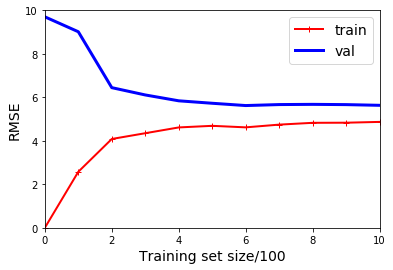

In [0]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 10, 0, 10])                       
plt.show()      

In [0]:
lin_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.06271039681805

degree=2 - 굉장히 overfit인 것을 볼 수 있다.

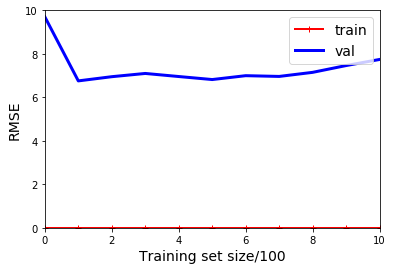

In [0]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)
plt.axis([0, 10, 0, 10])                       
plt.show()                                

regularization
---

1. ridge - poly

In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X = pipeline.fit_transform(AD_tr)
y = AD_label_reg.values

X_poly = poly_features.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly = scaler.transform(X_poly)

ridge_reg = Ridge(alpha=0.5, solver="cholesky", random_state=42) #solver로 sag도 있다. 
ridge_reg.fit(X_poly, y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='cholesky', tol=0.001)

In [0]:
ridge_predictions = ridge_reg.predict(X_poly)
ridge_lin_mse = mean_squared_error(y, ridge_predictions)
ridge_lin_rmse = np.sqrt(ridge_lin_mse)
ridge_lin_rmse

0.03882952530911337

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge_reg,X_poly,y,
                         scoring="neg_mean_squared_error",cv=5)
ridge_scores = np.sqrt(-scores)
display_scores(ridge_scores)

Scores: [7.70038346 8.06106113 8.10267098 7.25579019 7.39299652]
Mean: 7.702580458129809
Standard deviation: 0.34177460368263174


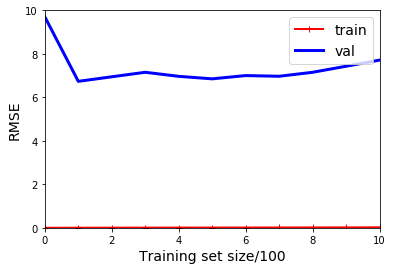

In [0]:
plot_learning_curves(ridge_reg, X_poly, y)
plt.axis([0, 10, 0, 10])                       
plt.show()   

2. lasso - poly

In [0]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.773606455462868, tolerance: 12.13046594584006
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

train loss

In [0]:
lasso_predictions = lasso_reg.predict(X_poly)
lasso_lin_mse = mean_squared_error(y, lasso_predictions)
lasso_lin_rmse = np.sqrt(lasso_lin_mse)
lasso_lin_rmse

4.004765099606787

validation loss

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso_reg,X_poly,y,
                         scoring="neg_mean_squared_error",cv=5)
lasso_lin_scores = np.sqrt(-scores)
display_scores(lasso_lin_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.54534030011564, tolerance: 9.525485342394495
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.186560980058857, tolerance: 9.489316921284404
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.01232287258972, tolerance: 9.729696244045872
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.466287293333

Scores: [5.59844112 5.84860497 5.54076765 5.3957772  5.5564153 ]
Mean: 5.588001248810971
Standard deviation: 0.14710680348430238


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.10105042604846, tolerance: 9.901194277195234
  positive)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


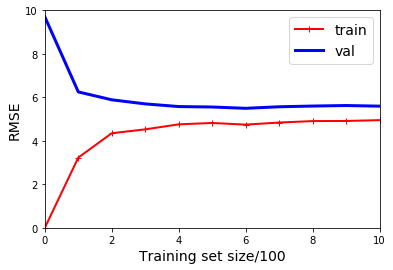

In [0]:
plot_learning_curves(lasso_reg, X, y)
plt.axis([0, 10, 0, 10])                       
plt.show()  

2) multioutput regression
---

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [0]:
#max depth가 높을 수록 fine detail을 learn한다. - overfit할 수 도 있음
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth, 
                                                          random_state=0))
regr_multirf.fit(X, y)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [0]:
#predict on new data
some_data = AD_tr.iloc[:5]
some_labels = AD_label_reg.iloc[:5]
some_data_prepared = pipeline.transform(some_data)

label_multirf = regr_multirf.predict(some_data_prepared)
label_rf = regr_rf.predict(some_data_prepared)

ValueError: ignored

In [0]:
print("1. multirf 예상한 label: ")
print(label_multirf)

1. multirf 예상한 label: 
[[29.63939394 10.0933    ]
 [29.4802585  12.3368    ]
 [28.63       16.2043    ]
 [23.04       24.4534    ]
 [23.95       21.7476    ]]


In [0]:
print("2. randomforest 예상한 label: ")
print(label_rf)

2. randomforest 예상한 label: 
[[29.57    9.6833]
 [29.39   12.6866]
 [28.41   15.7914]
 [22.78   24.7567]
 [24.18   23.601 ]]


In [0]:
print("실제 label: ")
print(some_labels)

실제 label: 
   MMSE  ADAS13
0  30.0   10.00
1  30.0   13.00
2  29.0   15.33
3  22.0   24.00
4  24.0   20.33


In [0]:
#RMSE사용해서 전체 error?알아봄
from sklearn.metrics import mean_squared_error

AD_predictions = regr_multirf.predict(X)
reg_multirf_mse = mean_squared_error(y, AD_predictions)
reg_multirf_rmse = np.sqrt(reg_multirf_mse)
reg_multirf_rmse

1.961898600211987

In [0]:
AD_predictions = regr_rf.predict(X)
reg_rf_mse = mean_squared_error(y, AD_predictions)
reg_rf_rmse = np.sqrt(reg_rf_mse)
reg_rf_rmse

1.954192382631079

3) decision tree
---

In [0]:
#fit regression model 
from sklearn.tree import DecisionTreeRegressor
reg_DTR = DecisionTreeRegressor(max_depth=30) 
#max depth - 30 : rmse = 0, overfit

reg_DTR.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
#predict - test set만들어서 결과 봐야함 사실/validation set만들기 관련해야함
label_DTR = reg_DTR.predict(X)

In [0]:
#prediction error - rmse

AD_predictions = reg_DTR.predict(X)
reg_DTR_mse = mean_squared_error(y, AD_predictions)
reg_DTR_rmse = np.sqrt(reg_DTR_mse)
reg_DTR_rmse

0.0

# cross validation

validation err
---

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr_multirf,X,y,
                         scoring="neg_mean_squared_error",cv=10)
regr_multirf_scores = np.sqrt(-scores)
display_scores(regr_multirf_scores)

Scores: [5.82815137 4.86506482 5.56836547 5.11480711 5.11778617 5.60439093
 4.86163352 5.08589749 4.75632083 4.99245505]
Mean: 5.1794872757074355
Standard deviation: 0.343980735091267


In [0]:
scores = cross_val_score(regr_rf,X,y,
                         scoring="neg_mean_squared_error",cv=10)
regr_rf_scores = np.sqrt(-scores)
display_scores(regr_rf_scores)

Scores: [5.94124847 4.90232586 5.54721368 5.11937045 5.19325757 5.59935568
 4.95719287 5.0941905  4.81684824 4.94357075]
Mean: 5.211457406031933
Standard deviation: 0.347281950417166


In [0]:
scores = cross_val_score(reg_DTR,X,y,
                         scoring="neg_mean_squared_error",cv=10)
reg_DTR_scores = np.sqrt(-scores)
display_scores(reg_DTR_scores)

Scores: [8.23147897 7.19776899 7.94556875 7.3263427  7.31656473 6.85722475
 6.98080907 6.93919696 6.94891284 7.03343812]
Mean: 7.277730588646227
Standard deviation: 0.4374130033895788


정리
(train_err, validation_err)
1.   regr_multirf : 1.9420607381264492, 5.166178311657196
2.   regr_rf :1.9344859256658384, 5.180684768651135
3.   decision tree(reg_DTR) : 0.0, 7.3558452908476415(depth=30)

--> decision tree의 depth를 낮춘다고 해도 validation err가 6이 넘는다.
따라서 multi random forest를 쓰는게 나을듯
근데 SVM도 생각해보기



# fine tune model

grid, final model
---
grid search : cross validation과 hyper parameter튜닝을 동시에 할 수 있다.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

* random forest model

decision tree의 overfit을 막는 여러종류의 decision tree만드는 거

tree 여러개를 만드는데, 그 tree만들 떄 사용하는 데이터를 무작위로 선택하고,
분할 테스트에서 특성을 무작위로 선택한다.

기본적으로 복원추출(bootstrap sampling)하고, 이것은 끌 수 있다.

max_features를 전체 특성 수로 하면 모든 특성을 고려해서, decision tree에서 무작위성이 들어가지 않는다. 이 값을 크게하면 모든 tree들이 매우 비슷해지고, 가장 두드러진 특성을 이용해서 데이터에 잘 맞춰진다.
이 값을 낮추면, tree들이 다 다르게 생겼고, 각tree는 데이터에 맞추기 위해 tree의 깊이가 깊어진다.

In [0]:
from sklearn.model_selection import GridSearchCV

#자세한 내용은 ch7에 hyperparameter나옴

param_grid = [
    {'n_estimators': [100],  #n_estimators : 생성할 tree개수-많을수록 좋은듯
    'max_features': [10,35,70,71],    #max_features : 최대 선택할 특성의 수
    #'max_depth' : [18]
     }
  ]

rf_reg = RandomForestRegressor(random_state=42)
#cv : cross validation 수
grid_search = GridSearchCV(rf_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [10, 35, 70, 71

In [0]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 100}

In [0]:
grid_search.best_score_

-26.791802921570063

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=35, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
#모든 조합
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.235090499932849 {'max_features': 10, 'n_estimators': 100}
5.17607987975167 {'max_features': 35, 'n_estimators': 100}
5.230576046822735 {'max_features': 70, 'n_estimators': 100}
5.224537562352212 {'max_features': 71, 'n_estimators': 100}


feature의 중요도

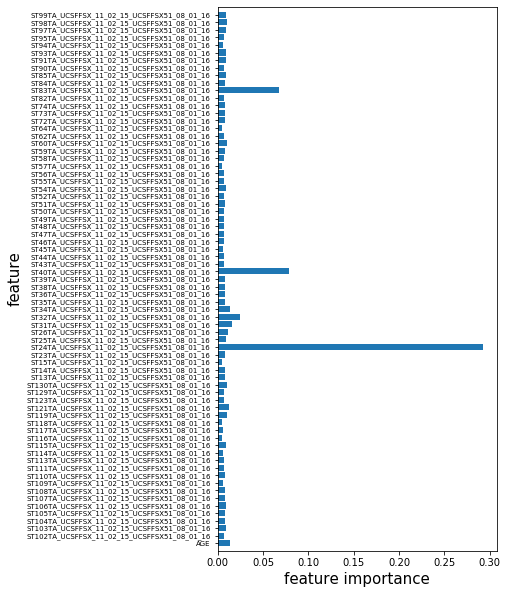

In [0]:
n_feature = AD_tr.shape[1]
index = np.arange(n_feature)

forest = RandomForestRegressor(n_estimators=100)
forest.fit(X,y)
plt.figure(figsize=(5,10))
plt.barh(index, forest.feature_importances_, align='center')
plt.yticks(index, AD_tr.columns,fontsize=7)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

analyze best model, their error

In [0]:
final_model = MultiOutputRegressor(grid_search.best_estimator_)

X_test = AD_tr.copy()
Y_test =AD_label_reg.copy()

X_test_prepared = pipeline.transform(X_test)
final_model.fit(X_test_prepared,Y_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
final_rmse

1.9546441622016666

# y각각(mmse, adas13)

In [0]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

imputer
---


In [0]:
#빈 데이터 median으로 채워넣음
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [0]:
mmse_x = imputer.fit_transform(y_mmse)
ada_x = imputer.fit_transform(y_ada)

In [0]:
y_mmse = pd.DataFrame(mmse_x, columns=y_mmse.columns,
                             index=y_mmse.index)
y_ada = pd.DataFrame(ada_x, columns=y_ada.columns,
                             index=y_ada.index)

1) linear
---

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y_mmse)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error

mmse_prediction = lin_reg.predict(X)
lin_mse = mean_squared_error(y_mmse, mmse_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.036718587405978

In [0]:
lin_reg.fit(X,y_ada)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error

adas_prediction = lin_reg.predict(X)
lin_mse = mean_squared_error(y_ada, adas_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.771554088251528

In [0]:
AD_reg_prediction = DataFrame({"MMSE":mmse_prediction.T[0],
                               "ADAS13":adas_prediction.T[0]})

In [0]:
AD_reg_prediction

,MMSE,ADAS13
0,29.577616,9.385777
1,28.170619,13.783046
2,26.762885,16.109400
3,25.844132,23.064042
4,25.235556,22.213718
...,...,...
1358,28.888751,12.133141
1359,26.272136,22.398804
1360,25.740012,21.011946
1361,26.805612,16.727585


train loss

In [0]:
total_lin_mse = mean_squared_error(y, AD_reg_prediction)
total_lin_rmse = np.sqrt(total_lin_mse)
total_lin_rmse

5.000108367545697

validation loss

In [0]:
scores = cross_val_score(lin_reg,X,y_mmse,
                         scoring="neg_mean_squared_error",cv=5)
scores += cross_val_score(lin_reg,X,y_ada,
                         scoring="neg_mean_squared_error",cv=5)
total_lin_scores = np.sqrt(-scores)
display_scores(total_lin_scores)

Scores: [7.56375176 7.9630438  7.35232765 7.32493043 7.28961088]
Mean: 7.49873290371284
Standard deviation: 0.25107205204119204


이런식으로 해보기 - 위에처럼 근데 따로따로 맞는 모델 찾아서 각각 맞게 regression한 후 합치고, 왜 y를 한꺼번에 해서 multioutput이 아니라 따로한건지 이유설명하기

# classification

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [0]:
X = pipeline.fit_transform(AD_tr)
y_cls = AD_label_class
y_cls = y_cls.values.T[0]
y_cls

array([1, 2, 1, ..., 3, 3, 2])

multiclass classification - bad
---

* randomforest를 일반적으로 많이 사용한다고 함
* 이거 이후에 각각에 대해서 binary classification해볼 것임


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

robust_pipeline = Pipeline([
                    ('imputer',SimpleImputer(strategy="median")),
                    ('rb_scaler',RobustScaler()),     
])

X_robust = robust_pipeline.fit_transform(AD_tr)
X = X_robust

In [0]:
X_plus = train_data.drop("DXCHANGE",axis=1)
X_plus = robust_pipeline.fit_transform(X_plus)

In [0]:
X= X_plus

In [0]:
lin_svm_clf = LinearSVC(C=0.1, loss="hinge", random_state=42).fit(X,y_cls)
lin_svm_clf_prediction = lin_svm_clf.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X, y_cls)
svm_clf_prediction = svm_clf.predict(X)

In [0]:
forest_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)
forest_clf.fit(X,y_cls)
forest_clf_prediction = forest_clf.predict(X)

poly_svm

In [0]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y_cls)
#polynomial_svm_clf_prediction = polynomial_svm_clf.predict(X)
#polynomial_svm_clf_prediction

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([1, 2, 1, ..., 3, 3, 2])

In [0]:
poly_svm_clf = SVC(kernel="poly",degree = 2, random_state=42).fit(X, y_cls)
rbf_svm_clf = SVC(kernel="rbf",gamma="auto", random_state=42).fit(X, y_cls)
sig_svm_clf = SVC(kernel="sigmoid",gamma="auto", random_state=42).fit(X, y_cls)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ovr,ovc

In [0]:
ovr_svm_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_svm_clf.fit(X, y_cls)
ovr_svm_clf_prediction = ovr_svm_clf.predict(X)

In [0]:
ovc_svm_clf = OneVsOneClassifier(SVC(gamma="auto", random_state=42))
ovc_svm_clf.fit(X, y_cls)
ovc_svm_clf_prediction = ovc_svm_clf.predict(X)

In [0]:
ovr_rf_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100,random_state=42))
ovr_rf_clf.fit(X, y_cls)
ovr_rf_clf_prediction = ovr_rf_clf.predict(X)

In [0]:
ovc_rf_clf = OneVsOneClassifier(RandomForestClassifier(n_estimators=100,random_state=42))
ovc_rf_clf.fit(X, y_cls)
ovc_rf_clf_prediction = ovc_rf_clf.predict(X)

multiclass classification - 모델의 accuracy
---
1.cross_val_score

set up

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [0]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

linear svm

In [0]:
cross_val_score(lin_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6449296104925244

svm - 50퍼정도/bad

In [0]:
cross_val_score(svm_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.6999199476020669

In [0]:
y_svm_pred = cross_val_predict(svm_clf, X, y_cls, cv=3)
svm_conf_mx = confusion_matrix(y_cls, y_svm_pred)
svm_conf_mx

array([[242, 168,   0],
       [120, 540,  32],
       [  0,  89, 172]])

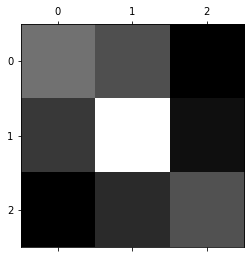

In [0]:
plt.matshow(svm_conf_mx, cmap=plt.cm.gray)
plt.show()

random forest- svm보다는 낫지만 그래도 bad

In [0]:
cross_val_score(forest_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.7072459549280742

In [0]:
y_forest_pred = cross_val_predict(forest_clf, X, y_cls, cv=3)
forest_conf_mx = confusion_matrix(y_cls, y_forest_pred)
forest_conf_mx

array([[239, 171,   0],
       [103, 560,  29],
       [  0,  96, 165]])

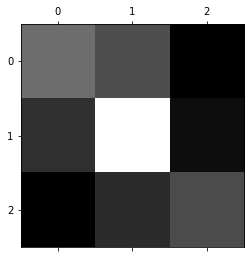

In [0]:
plt.matshow(forest_conf_mx, cmap=plt.cm.gray)
plt.show()

polynomial svm

In [0]:
cross_val_score(polynomial_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6236453759632568

In [0]:
print(cross_val_score(poly_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean())
print(cross_val_score(rbf_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean())
print(cross_val_score(sig_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5825324050489612
0.6999199476020669
0.551747002078128


ovr

In [0]:
cross_val_score(ovr_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.6757085445827168

In [0]:
cross_val_score(ovc_svm_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.6999199476020669

In [0]:
cross_val_score(ovr_rf_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.7109057241507571

In [0]:
cross_val_score(ovc_rf_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.7226596802755744

softmax regression - multinomial logistic regression
---

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=0.1, random_state=42)
#C값이 regularization 강도 결정
# C 낮을수록 계수를 0으로 근사-regularization강화됨

softmax_reg.fit(X, y_cls)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
softmax_pred = softmax_reg.predict(X)
softmax_pred

array([2, 2, 2, ..., 2, 3, 1])

In [0]:
cross_val_score(softmax_reg, X, y_cls, cv=3, scoring="accuracy").mean()

0.7050837315737978

binary classifier
---

In [0]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

class 1 classifier

In [0]:
y_cls_1 = (y_cls == 1)

sgd1_clf = SGDClassifier(max_iter=1000,tol=1e-3, random_state=42)
lin_svm1_clf = LinearSVC(C=0.01,loss="hinge", random_state=42)
poly_svm1_clf = SVC(kernel="poly",degree=3,gamma="auto",coef0=0.1,C=0.18, random_state=42)
rbf_svm1_clf = SVC(kernel="rbf",gamma="auto",C=1.3, random_state=42)
sig_svm1_clf = SVC(kernel="sigmoid",gamma="auto", random_state=42)
rf1_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

cls1_clf = rf1_clf
cls1_clf = cls1_clf.fit(X, y_cls_1)

In [0]:
cross_val_score(cls1_clf, X, y_cls_1, cv=3, scoring="accuracy").mean()

0.7981951823011425

In [0]:
y_cls_1_pred = cross_val_predict(cls1_clf, X, y_cls_1, cv=3)
confusion_matrix(y_cls_1,y_cls_1_pred)

array([[863,  90],
       [185, 225]])

In [0]:
precision_score(y_cls_1,y_cls_1_pred)

0.7142857142857143

In [0]:
recall_score(y_cls_1,y_cls_1_pred)

0.5487804878048781

In [0]:
f1_score(y_cls_1,y_cls_1_pred)

0.6206896551724138

In [0]:
y_probas = cross_val_predict(rf1_clf, X, y_cls_1, cv=3
                             ,method="predict_proba")
y_scores_forest = y_probas[:,1]
y_scores_forest

array([0.54, 0.44, 0.26, ..., 0.07, 0.07, 0.48])

In [0]:
rbf_svm1_clf.fit(X,y_cls_1)
y_scores_rbf = cross_val_predict(rbf_svm1_clf, X, y_cls_1, cv=3
                             ,method="decision_function")

In [0]:
precisions, recalls, thresholds = precision_recall_curve(y_cls_1, y_scores_rbf)

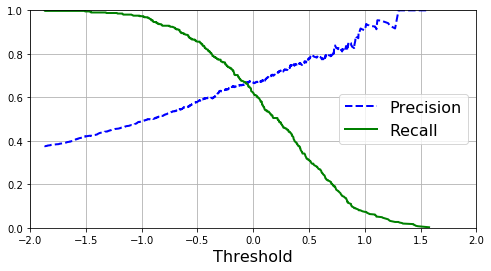

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-2, 2, 0, 1])             
plt.figure(figsize=(8, 4))                     
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

In [0]:
threshold = thresholds[np.argmax(abs(precisions - recalls) <0.01)]
threshold

-0.07958409169386749

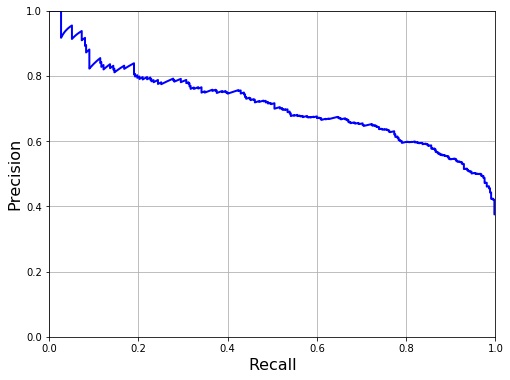

In [0]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#plt.plot( [0.3,0.3],[0., 0.9], "r:")
plt.show()

In [0]:
fpr, tpr, thresholds = roc_curve(y_cls_1, y_scores_rbf)

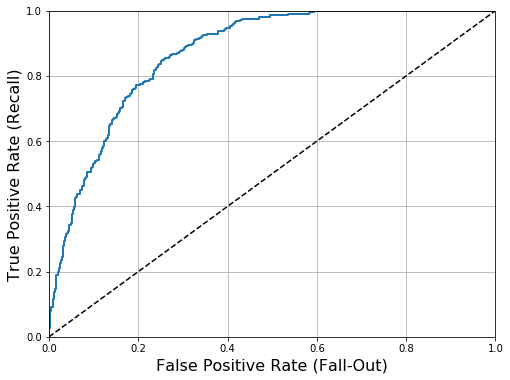

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

In [0]:
roc_auc_score(y_cls_1, y_scores_forest)

0.8821180866583062

In [0]:
roc_auc_score(y_cls_1, y_scores_rbf)

0.8711232820617818

다시 생각해보니, 나는 AD로 판단하는게 나은지 정상이라고 판단하는게 나을지 모르니깐 tradeoff를 생각할 게 아니라 각각의 class라고 판단했을 때 실제 그 class일 accuracy에 집중을 해야한다. 

random forest로 important feature찾고, 다시 rf, ovc에 적용
---

In [0]:
forest_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)
forest_clf.fit(X,y_cls)
forest_clf_prediction = forest_clf.predict(X)

In [0]:
cross_val_score(forest_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.7072459549280742

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {
    'max_features' : ['auto'], # 'sqrt','log2'
    'max_depth' : [15], # 10,20,30,40,50,60,70, 14,16
    'criterion' : ['entropy'], #'gini'
    'min_samples_split' : [3], #2,10  4,5
    'bootstrap' : [False] #True
}

GS_rfc = GridSearchCV(forest_clf,param_grid,
                      cv=3, scoring = "accuracy")
GS_rfc.fit(X,y_cls)
GS_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 3}

In [0]:
forest_clf = GS_rfc.best_estimator_

In [0]:
GS_rfc.best_score_

0.7241379310344828

In [0]:
feat_importances = pd.Series(forest_clf.feature_importances_, 
                             index=AD_tr.columns)
feat_importances.nlargest(10).plot(kind='barh')
#feat_importances.plot(kind='barh')
plt.show()

ValueError: ignored

In [0]:
forest_clf.feature_importances_

array([0.03282414, 0.01178233, 0.01578318, 0.01085754, 0.01013847,
       0.01171511, 0.0099077 , 0.00994037, 0.01034577, 0.01056504,
       0.01010386, 0.01207335, 0.01033113, 0.00954516, 0.00941717,
       0.01353336, 0.01010571, 0.0195898 , 0.01302499, 0.01062936,
       0.01192322, 0.01180127, 0.01534307, 0.01233055, 0.01196578,
       0.01037157, 0.05361692, 0.0122281 , 0.02059722, 0.0171842 ,
       0.0279254 , 0.01501914, 0.01247977, 0.0108491 , 0.00973957,
       0.010268  , 0.03268057, 0.01193613, 0.01732759, 0.01203847,
       0.01024926, 0.01080969, 0.01035652, 0.0107361 , 0.01061566,
       0.01097919, 0.01089992, 0.01082188, 0.01112077, 0.00947721,
       0.01105996, 0.01524824, 0.01088504, 0.01314756, 0.01145556,
       0.01246485, 0.01320806, 0.01070619, 0.01151698, 0.01113611,
       0.04548989, 0.01199086, 0.01713144, 0.0120784 , 0.02265999,
       0.01162043, 0.01133265, 0.01061965, 0.01064839, 0.00993819,
       0.01975616])

In [0]:
from sklearn.feature_selection import SelectFromModel
sfm_clf = SelectFromModel(forest_clf,threshold = 0.01) #이것보다 큰 것들만 참고
#sfm_clf= SelectFromModel(forest_clf)
sfm_clf.fit(X,y_cls)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False,
                                                 class_weight=None,
                                                 criterion='entropy',
                                                 max_depth=15,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=3,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=42, verbose=0,
 

In [0]:
X_important = sfm_clf.transform(X)

In [0]:
important_rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
important_rf_clf.fit(X_important,y_cls)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
important_rf_clf_prediction = important_rf_clf.predict(X_important)
important_rf_clf_prediction

array([1, 2, 1, ..., 3, 3, 2])

In [0]:
cross_val_score(important_rf_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.5700781925947488

In [0]:
important_ovc_rf_clf = OneVsOneClassifier(important_rf_clf)
important_ovc_rf_clf.fit(X, y_cls)
#important_ovc_rf_clf_prediction = ovc_rf_clf.predict(X_important)

OneVsOneClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=1000,
                                                    n_jobs=None,
                                                    oob_sc

In [0]:
cross_val_score(important_ovc_rf_clf, X, y_cls, cv=3, scoring="accuracy").mean()

0.5737508995787142

더 떨어짐 모두 다 중요한 feature인 것 같고, outlier를? 없애야할듯

randomforest grid search
---

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {
    'max_features' : ['log2'], # 'auto','sqrt',
    'max_depth' : [15], # 14, 16
    'criterion' : ['gini'], #'entropy'
    'min_samples_split' : [2], #3, 10
    'bootstrap' : [True] #False
}

GS_rfc = GridSearchCV(estimator=important_rf_clf,param_grid=param_grid,
                      cv=3, scoring = "accuracy")
GS_rfc.fit(X,y_cls)
GS_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_split': 2}

In [0]:
final_clf = GS_rfc.best_estimator_

In [0]:
GS_rfc.best_score_

0.5766691122523845

KNN
---

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(X_plus,test_size=0.2,random_state= 42)
y_cls_train,y_cls_test = train_test_split(y_cls,test_size=0.2,random_state= 42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn_grid_param = {
    'n_neighbors' : [61] #100,110,등등해봄
}
#knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=150)
knn_clf = KNeighborsClassifier(weights = 'distance' )
knn_clf =GridSearchCV(knn_clf,knn_grid_param,
                      cv=5, scoring = "accuracy")
knn_clf.fit(X_train, y_cls_train)
knn_clf = knn_clf.best_estimator_
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='distance')

In [0]:
cross_val_score(knn_clf, X_train, y_cls_train, cv=5, scoring="accuracy").mean()

0.6027952857978762

In [0]:
y_knn_pred = knn_clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_cls_test, y_knn_pred)

0.6043956043956044

using keras - ANN classification -그냥 안함
---

In [0]:
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

TensorFlow 2.x selected.


In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
X.shape

(1363, 71)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[71]),
    keras.layers.Dense(30, activation="relu"),
    #keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 5041)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                151260    
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 93        
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
X_valid, X_train = X[:200],X[200:]
y_cls_valid, y_cls_train = y_cls[:200],y_cls[200:]

In [0]:
history = model.fit(X_train, y_cls_train, epochs=30,
                    validation_data=(X_valid, y_cls_valid))

ValueError: ignored

# test set

In [0]:
# Load test dataset
csv_file_test = '/content/gdrive/My Drive/BNCS401_Midterm_Project/Test_data_ageupdated.csv'  # Set your path
test_data = pd.read_csv(csv_file_test)
test_data

,RID,AGE,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,1002,76.3,1.996,2.220,2.342,2.803,2.230,1.402,1.764,2.156,2.026,1.941,2.964,2.122,2.454,1.925,2.451,2.311,3.016,2.317,1.121,2.956,2.936,2.219,2.907,2.320,1.573,3.061,2.696,2.529,2.283,2.949,2.293,2.097,2.686,1.768,2.387,2.674,1.819,2.135,2.133,3.003,2.374,1.411,1.727,2.434,2.157,2.063,3.182,2.085,2.485,1.905,2.488,2.182,3.563,2.187,0.975,2.338,2.253,2.476,1.639,3.655,2.507,2.461,2.157,2.911,2.410,1.968,2.800,1.767,2.080,2.766
1,260,78.6,2.209,2.805,2.386,2.710,2.209,1.517,1.648,2.457,2.184,2.132,3.077,2.279,2.552,2.169,2.338,2.342,4.067,2.303,1.082,3.035,2.973,2.370,2.669,2.502,1.914,3.925,2.438,2.820,2.380,2.932,2.328,2.134,2.831,1.838,2.635,2.786,2.219,2.797,2.456,2.797,2.147,1.469,1.729,2.692,2.329,2.274,2.994,2.268,2.627,2.142,2.458,2.314,3.839,2.167,1.228,2.366,2.834,2.320,1.607,3.849,2.843,2.619,2.484,2.811,2.402,1.950,2.685,1.795,2.332,2.965
2,1406,61.1,2.114,3.157,2.700,2.856,2.463,1.610,1.671,2.720,2.174,2.170,2.997,2.353,2.818,1.856,2

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 72 columns):
RID                                            344 non-null int64
AGE                                            344 non-null float64
ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16    344 non-null float64
ST114TA_UCSFF

In [0]:
test_data.drop("RID",axis=1)

,AGE,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,76.3,1.996,2.220,2.342,2.803,2.230,1.402,1.764,2.156,2.026,1.941,2.964,2.122,2.454,1.925,2.451,2.311,3.016,2.317,1.121,2.956,2.936,2.219,2.907,2.320,1.573,3.061,2.696,2.529,2.283,2.949,2.293,2.097,2.686,1.768,2.387,2.674,1.819,2.135,2.133,3.003,2.374,1.411,1.727,2.434,2.157,2.063,3.182,2.085,2.485,1.905,2.488,2.182,3.563,2.187,0.975,2.338,2.253,2.476,1.639,3.655,2.507,2.461,2.157,2.911,2.410,1.968,2.800,1.767,2.080,2.766
1,78.6,2.209,2.805,2.386,2.710,2.209,1.517,1.648,2.457,2.184,2.132,3.077,2.279,2.552,2.169,2.338,2.342,4.067,2.303,1.082,3.035,2.973,2.370,2.669,2.502,1.914,3.925,2.438,2.820,2.380,2.932,2.328,2.134,2.831,1.838,2.635,2.786,2.219,2.797,2.456,2.797,2.147,1.469,1.729,2.692,2.329,2.274,2.994,2.268,2.627,2.142,2.458,2.314,3.839,2.167,1.228,2.366,2.834,2.320,1.607,3.849,2.843,2.619,2.484,2.811,2.402,1.950,2.685,1.795,2.332,2.965
2,61.1,2.114,3.157,2.700,2.856,2.463,1.610,1.671,2.720,2.174,2.170,2.997,2.353,2.818,1.856,2.916,2.372,3.734,2

In [0]:
test_data["ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16"].value_counts()

In [0]:
# Sample code to save the csv file into Google Drive

# test_prediction.to_csv('Test_prediction.csv', index=False)
# !cp Test_prediction.csv /content/gdrive/My\ Drive/BNCS401_Midterm_Project